# PISA Data Exploration



## 1 : Preliminary Wrangling
This document explore a survey of students' skills and knowledge as they approach the end of compulsory education..
### Goals throughout this section:
       .finding significant issues in the data which would cause inaccurate assumptions or Inforamtion
       .Exploring the data to find insights to  help us in the data analysis section




In [82]:
#load all the neccessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(style='ggplot')

In [83]:
#Loading The DataSet

df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [84]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [85]:
print(df.shape)
print('-' *50)
print(df.dtypes)
print('-' *50)
print(df.head(10))
print('-'*100)

(183412, 16)
--------------------------------------------------
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
--------------------------------------------------
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28

We can see that  the data size is relatively good which can increase the prospects of the analysis .

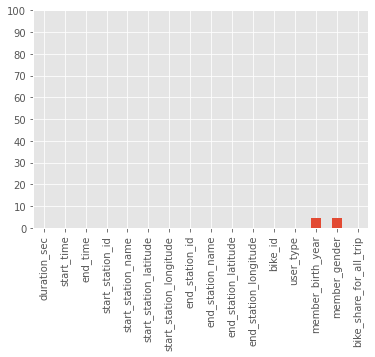

In [86]:
nanPerc = df.isna().sum()/len(df) * 100

#Create a Bar PLot to Investigate 
nanPerc.plot.bar()
plt.yticks(range(0,110,10))
plt.show()

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64
----------------------------------------------------------------------------------------------------


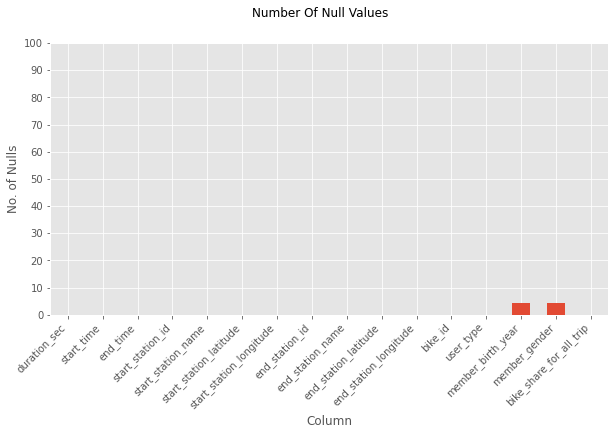

In [87]:
#creating a data with the null values count
nullPerc = df.isna().sum() /len(df) * 100
#visulization for the nnull counts 
fig = plt.figure(figsize=(10, 5))
ax = nullPerc.plot.bar()
ticks = plt.xticks(rotation = 45,ha='right')
yticks = plt.yticks(range(0,110,10))
title = fig.suptitle("Number Of Null Values")
plt.ylabel('No. of Nulls')
plt.xlabel('Column')

print(nullPerc)
print('-'*100)
plt.show()




we can see the number of nan values is insignificant which is great for going through with the analysis

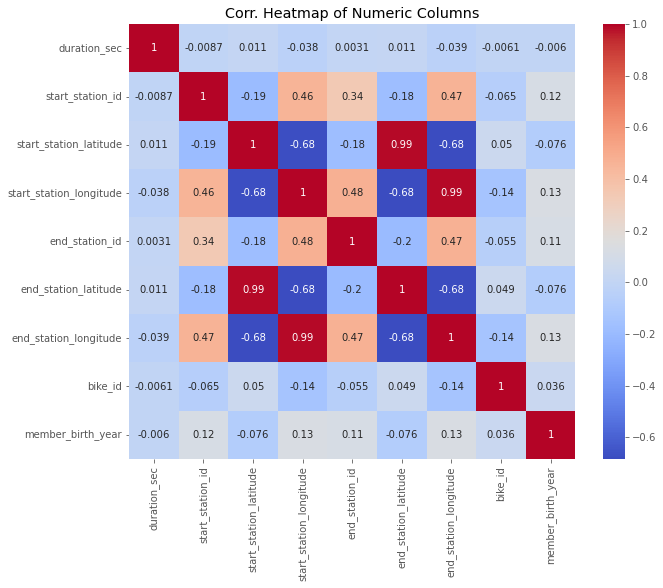

In [88]:
correlation_DF = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_DF.corr(), annot=True, cmap='coolwarm')
plt.title('Corr. Heatmap of Numeric Columns')
plt.show()


In [95]:
#unique values in object columns to see any uncommon values

df.apply(lambda col: print(col.unique()) if col.dtype == 'O'  else col)
print('-'*100)

['2019-02-28 17:32:10.1450' '2019-02-28 18:53:21.7890'
 '2019-02-28 12:13:13.2180' ... '2019-02-01 00:06:05.5490'
 '2019-02-01 00:05:34.3600' '2019-02-01 00:00:20.6360']
['2019-03-01 08:01:55.9750' '2019-03-01 06:42:03.0560'
 '2019-03-01 05:24:08.1460' ... '2019-02-01 00:08:27.2200'
 '2019-02-01 00:07:54.2870' '2019-02-01 00:04:52.0580']
['Montgomery St BART Station (Market St at 2nd St)'
 'The Embarcadero at Steuart St' 'Market St at Dolores St'
 'Grove St at Masonic Ave' 'Frank H Ogawa Plaza'
 '4th St at Mission Bay Blvd S' 'Palm St at Willow St'
 'Washington St at Kearny St' 'Post St at Kearny St' 'Jones St at Post St'
 'Civic Center/UN Plaza BART Station (Market St at McAllister St)'
 'Valencia St at 21st St' 'Channing Way at Shattuck Ave'
 'Bancroft Way at College Ave' 'Howard St at Mary St'
 '22nd St at Dolores St' 'Laguna St at Hayes St' '5th St at Folsom'
 'Telegraph Ave at 23rd St' 'Page St at Scott St'
 'Lake Merritt BART Station' 'West St at 40th St'
 'The Embarcadero at San

object columns show no irregular values which is a goog indication that can help us in categorical data analysis

In [93]:
df['member_gender'].dtype

dtype('O')

## 2 : Data Cleaning
### Goals throughout this section:
       .Cleaning Issues Found Within the data in the wrangling proccess
       


In [96]:
# dtypes issue


# id columns into objects
df = df.apply(lambda col: col.astype('object') if 'id' in col.name else col)

# date columns into datetime
df = df.apply(lambda col: pd.to_datetime(col) if 'time' in col.name else col)

df.info()
print('-'*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

We started by working on the data type issue by converting (IDs) to objects using lambda functions to prevent conflicts in data interpretation,as IDs can't be described as discrete or continuous, making them more appropriately represented as objects.

In [97]:
#droping rows with more than 50% nan values
print(f'shape before : {df.shape}')
print('-'*100)
df.dropna(thresh=df.shape[1]*0.5)
print(f'shape after : {df.shape}')
print('-'*100)



shape before : (183412, 16)
----------------------------------------------------------------------------------------------------
shape after : (183412, 16)
----------------------------------------------------------------------------------------------------


the data shape didn't change which means the rows with nan values wouldn't have much of an effect on the data and i've decided to keep them as they can be used in other ways. 

In [98]:
# removing word inside parenthesis to help us with districts comparisons

df['end_station_name'].str.replace(r"\(.*\)","", regex=True)
df['start_station_name'].str.replace(r"\(.*\)","", regex=True)


0           Montgomery St BART Station 
1         The Embarcadero at Steuart St
2               Market St at Dolores St
3               Grove St at Masonic Ave
4                   Frank H Ogawa Plaza
                      ...              
183407          Beale St at Harrison St
183408      Montgomery St BART Station 
183409           The Alameda at Bush St
183410      San Pablo Ave at MLK Jr Way
183411            Spear St at Folsom St
Name: start_station_name, Length: 183412, dtype: object

In [101]:
df.to_csv('Ford_GoBike_DF(clean).csv',index=False)